In [7]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
'''
   Gamers Classification on the basis of
   the information regarding to the system
   nature of system, age, internet speed, etc.
'''

# Ownership
__author__ = ["M. Haseeb Hassan"]
__copyright__ = ["Copyrights @ hacceebhassan"]
__license__ = "MIT"
__version__ = "1.0.1"
__maintainer__ = "M. Haseeb Hassan"
__email__ = "hacceebhassan@gmail.com"
__status__ = "Development"


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from plotly import graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

## Dataset

In [4]:
data = pd.read_excel('data/dataset.xlsx')
data.head()

,Timestamp,What is your age limit?,What genres game do you like?,How long do you play games in average?,Please select your internet speed.,Can you please select the GPU that you are currently using?,"Can you please select an estimate of your monthly gaming cost(Including purchasing Game and Game Items , In app Purchase, And Net Bill)?",What is your preferred CPU model?,What do you seek in a game?,What is your RAM size?,Preference
0,2020-10-07 22:02:01.105,16-28,Action games.,1-1.5 hours,10mbps,"RX5000 series (Could be 5700xt,5600xt,5500xt)",500-2k (BDT),Intel,"Thrill (Online games mostly FPS,TPS)",16GB,High
1,2020-10-07 22:04:20.584,16-28,Strategy games.,4-5hours,5mbps,"GTX 1000 series (Could be 1080,1070,1060, 1050...",500-2k (BDT),Intel,Story,8GB,Medium
2,2020-10-07 22:05:03.848,16-28,Action-adventure games.,4-5hours,5mbps,"RX500 series (Could be 590,580,570,560,550)","I play cracked Games (Could be Fitgirl, Codex,...",AMD (Ryzen),Story,8GB,Medium
3,2020-10-07 22:06:38.126,16-28,Action-adventure games.,2-3hours,100mbps,"RX500 series (Could be 590,580,570,560,550)","I play cracked Games (Could be Fitgirl, Codex,...",AMD (Ryzen),Way to pass time,12GB,Medium
4,2020-10-07 22:09:10.597,16-28,Action-adventure games.,1-1.5 hours,15mbps,"GTX 1000 series (Could be 1080,1070,1060, 1050...","I play cracked Games (Could be Fitgirl, Codex,...",Intel,Story,16GB,High


In [64]:
data.columns

Index(['Timestamp', 'What is your age limit?', 'What genres game do you like?',
       'How long do you play games in average?',
       'Please select your internet speed.',
       'Can you please select the GPU that you are currently using?',
       'Can you please select an estimate of your monthly gaming cost(Including purchasing Game and Game Items , In app Purchase, And Net Bill)?',
       'What is your preferred CPU model?', 'What do you seek in a game?',
       'What is your RAM size?', 'Preference'],
      dtype='object')

## **Data Cleaning**

In [65]:
df = data.drop(['What do you seek in a game?', 'Timestamp'], axis=1)

df = df.rename(columns={"What is your age limit?": "Age Limit",
                   'What genres game do you like?' : 'Genre',
                   "How long do you play games in average?": 'Playtime (min)', 
                   'Please select your internet speed.': 'Internet Speed (Mbps)',
                   'Can you please select the GPU that you are currently using?' : 'GPU',
                   'Can you please select an estimate of your monthly gaming cost(Including purchasing Game and Game Items , In app Purchase, And Net Bill)?' : 'Monthly Cost (BDT)',
                   'What is your preferred CPU model?' : 'CPU',
                   'What is your RAM size?' : 'RAM (GB)'})



In [66]:
df.head()

,Age Limit,Genre,Playtime (min),Internet Speed (Mbps),GPU,Monthly Cost (BDT),CPU,RAM (GB),Preference
0,16-28,Action games.,1-1.5 hours,10mbps,"RX5000 series (Could be 5700xt,5600xt,5500xt)",500-2k (BDT),Intel,16GB,High
1,16-28,Strategy games.,4-5hours,5mbps,"GTX 1000 series (Could be 1080,1070,1060, 1050...",500-2k (BDT),Intel,8GB,Medium
2,16-28,Action-adventure games.,4-5hours,5mbps,"RX500 series (Could be 590,580,570,560,550)","I play cracked Games (Could be Fitgirl, Codex,...",AMD (Ryzen),8GB,Medium
3,16-28,Action-adventure games.,2-3hours,100mbps,"RX500 series (Could be 590,580,570,560,550)","I play cracked Games (Could be Fitgirl, Codex,...",AMD (Ryzen),12GB,Medium
4,16-28,Action-adventure games.,1-1.5 hours,15mbps,"GTX 1000 series (Could be 1080,1070,1060, 1050...","I play cracked Games (Could be Fitgirl, Codex,...",Intel,16GB,High


In [67]:
# Setting up the Monthly Cost Column
df['Monthly Cost (BDT)'] = df['Monthly Cost (BDT)'].replace({'\(BDT\)':''}, regex=True)
df['Monthly Cost (BDT)'] = df['Monthly Cost (BDT)'].replace({'I play cracked Games \(Could be Fitgirl, Codex, RG-Mechanics, Black Box, Skidrow, Reloaded etc\)':'0'}, regex=True)
df['Monthly Cost (BDT)'] = df['Monthly Cost (BDT)'].replace({'k':'000'}, regex=True)

In [68]:
# Setting up the Internet Speed Column
df['Internet Speed (Mbps)'] = df['Internet Speed (Mbps)'].replace({'mbps':''}, regex=True)

In [69]:
# Setting up the GPU Column
df['GPU'] = df['GPU'].str.replace(r"\(.*\)","")
df['GPU'] = df['GPU'].str.replace("series","")

In [70]:
# Setting up the GPU Column
df['Playtime (min)'] = df['Playtime (min)'].str.replace("1-1.5 hours","80")
df['Playtime (min)'] = df['Playtime (min)'].str.replace("2-3hours","150")
df['Playtime (min)'] = df['Playtime (min)'].str.replace("4-5hours","270")
df['Playtime (min)'] = df['Playtime (min)'].str.replace("30-50min","45")
df['Playtime (min)'] = df['Playtime (min)'].str.replace("6-8hours","420")
df['Playtime (min)'] = df['Playtime (min)'].str.replace("30-50min","45")
df['Playtime (min)'] = df['Playtime (min)'].str.replace(r"9.*s","550")

In [71]:
# Setting up the RAM Column
df['RAM (GB)'] = df['RAM (GB)'].str.replace(r"\(.*\)","")
df['RAM (GB)'] = df['RAM (GB)'].str.replace("GB","")

In [72]:
# Setting up the Genre Column
df['Genre'] = df['Genre'].str.replace(".","")

In [85]:
# Setting up the Genre Column
df['Preference'] = df['Preference'].str.replace("very High","Very High")
df['Preference'] = df['Preference'].str.replace(" High","High")
df['Preference'] = df['Preference'].str.replace("VeryHigh","Very High")

In [86]:
# Setting up the dataframe
df = df.replace("Gigabit","")

In [87]:
# Dataframe after cleaning
df = df.dropna()
df.head()

,Age Limit,Genre,Playtime (min),Internet Speed (Mbps),GPU,Monthly Cost (BDT),CPU,RAM (GB),Preference
0,16-28,Action games,80,10,RX5000,500-2000,Intel,16,High
1,16-28,Strategy games,270,5,GTX 1000,500-2000,Intel,8,Medium
2,16-28,Action-adventure games,270,5,RX500,0,AMD (Ryzen),8,Medium
3,16-28,Action-adventure games,150,100,RX500,0,AMD (Ryzen),12,Medium
4,16-28,Action-adventure games,80,15,GTX 1000,0,Intel,16,High


## **Exploratory Data Analysis**

*Most of the data is categorical so we'll have categorical plots to check how the categories are distributed*

In [91]:
# Function to work plotly on Colab
# Have to run it in every cell plotly will be used
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [95]:
# Configuring Plotly

configure_plotly_browser_state()

# Make pie chart to compare the numbers of sarcastic and not-sarcastic headlines
labels = ['High', 'Medium', 'Low', 'Very High']

count_low = len(df[df['Preference']=='Low'])
count_high = len(df[df['Preference']=='High'])
count_medium = len(df[df['Preference']=='Medium'])
count_vhigh = len(df[df['Preference']=='Very High'])

values = [count_low, count_medium, count_high, count_vhigh]
# values = [20,50]

trace = go.Pie(labels=labels,
               values=values,
               textfont=dict(size=19, color='#FFFFFF'),
               opacity = 0.7,
               marker=dict(
                   colors=['orange', 'blue', 'green', 'red']
               )
              )

layout = go.Layout(title = '<b>Preferences Distribution in the data</b>')
chart = [trace]
fig = go.Figure(data=chart, layout=layout)

plt.figure(figsize=[15, 6])
iplot(fig)

fig.write_image("plots/preference_distribution.pdf")

<Figure size 1080x432 with 0 Axes>

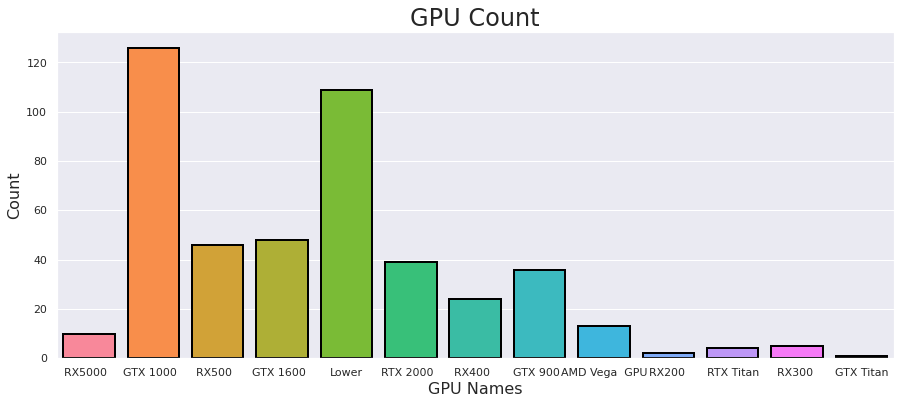

In [26]:
# Plotting GPU counts in the data
sns.set_theme(style="darkgrid")
plt.figure(figsize=[15, 6])
sns.countplot(x="GPU", data=df, saturation = 1, linewidth = 2, edgecolor = (0, 0, 0))
plt.title('GPU Count', fontsize = 24)
plt.xlabel('GPU Names', fontsize=16)
plt.ylabel('Count', fontsize=16)

plt.savefig("plots/gpu.pdf")

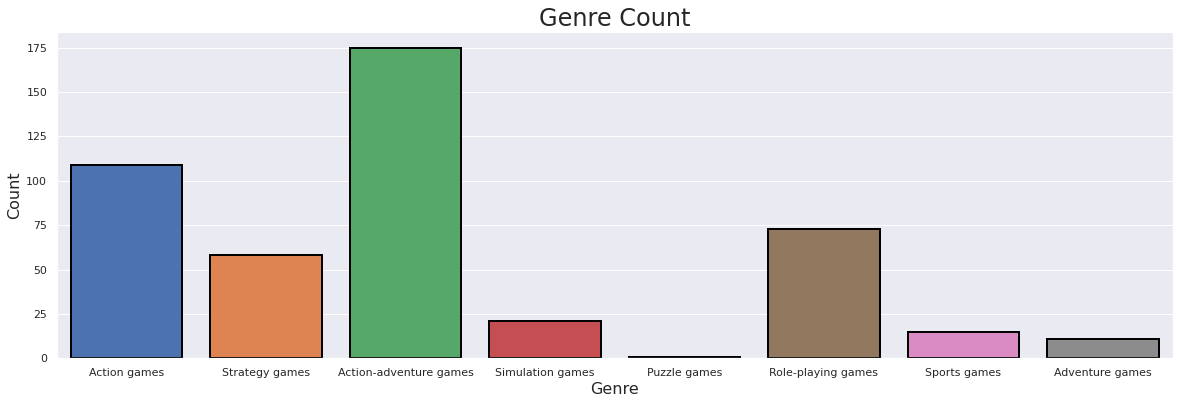

In [27]:
# Plotting Genre counts in the data
sns.set_theme(style="darkgrid")
plt.figure(figsize=[20, 6])
sns.countplot(x="Genre", data=df, saturation = 1, linewidth = 2, edgecolor = (0, 0, 0))

plt.title('Genre Count', fontsize = 24)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Count', fontsize=16)

plt.savefig("plots/genre.pdf")

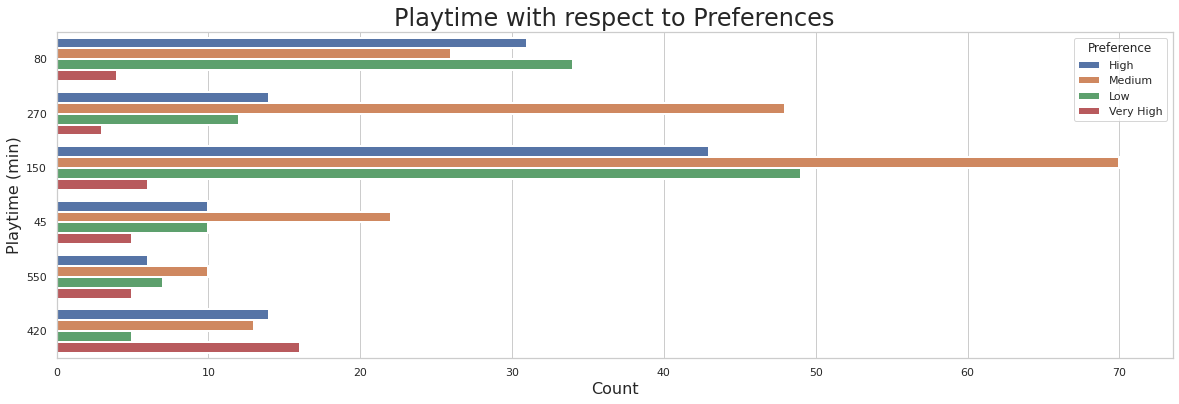

In [112]:
# Plotting Time column w.r.t the Preference
sns.set_theme(style="whitegrid")
plt.figure(figsize=[20, 6])
sns.countplot(y="Playtime (min)", data=df, saturation = 0.8, linewidth = 2, hue = 'Preference')

plt.title('Playtime with respect to Preferences', fontsize = 24)
plt.ylabel('Playtime (min)', fontsize=16)
plt.xlabel('Count', fontsize=16)

plt.savefig("plots/playtime.pdf")

## **ML Model**

In [293]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [294]:
df.head()

,Age Limit,Genre,Playtime (min),Internet Speed (Mbps),GPU,Monthly Cost (BDT),CPU,RAM (GB),Preference
0,16-28,Action games,80,10,RX5000,500-2000,Intel,16,High
1,16-28,Strategy games,270,5,GTX 1000,500-2000,Intel,8,Medium
2,16-28,Action-adventure games,270,5,RX500,0,AMD (Ryzen),8,Medium
3,16-28,Action-adventure games,150,100,RX500,0,AMD (Ryzen),12,Medium
4,16-28,Action-adventure games,80,15,GTX 1000,0,Intel,16,High


In [375]:
df_m = df.copy()
# Convert these variables into categorical variables
df_m["Age Limit"] = df_m["Age Limit"].astype('category').cat.codes
df_m["Genre"] = df_m["Genre"].astype('category').cat.codes
df_m["GPU"] = df_m["GPU"].astype('category').cat.codes
df_m["CPU"] = df_m["CPU"].astype('category').cat.codes
df_m["Monthly Cost (BDT)"] = df_m["Monthly Cost (BDT)"].astype('category').cat.codes

# Target Variable
df_m['Preference_label'] = pd.Categorical(df_m['Preference'])
df_m['Preference_label'] = df_m['Preference_label'].astype('category')
df_m["Preference_label"] = df_m["Preference_label"].astype('category').cat.codes

#Legend
legend = dict( enumerate(df['Preference_label'].cat.categories ) )

# Label Encoding
col = ['Age Limit', 'Genre', 'Playtime (min)', 'Internet Speed (Mbps)', 'GPU',
       'Monthly Cost (BDT)', 'CPU', 'RAM (GB)', 'Preference']
le = LabelEncoder()
for name in col:
  le.fit(df_m['Age Limit'].astype(str))
  df_m['Age Limit'] = le.transform(df_m['Age Limit'].astype(str))

# Changing data types
df_m["Playtime (min)"] = pd.to_numeric(df_m["Playtime (min)"])
df_m["Internet Speed (Mbps)"] = pd.to_numeric(df_m["Internet Speed (Mbps)"])
df_m["RAM (GB)"] = pd.to_numeric(df_m["RAM (GB)"])


In [376]:
print(legend)

{0: 'High', 1: 'Low', 2: 'Medium', 3: 'VeryHigh'}


In [377]:
df_m.dropna(subset = col, inplace=True)

In [378]:
# Setting up the model for training
y = df_m['Preference_label']
X = df_m.drop('Preference', axis = 1)
X = X.drop('Preference_label', axis = 1)

# Splitting up the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [379]:
X_train.head()

,Age Limit,Genre,Playtime (min),Internet Speed (Mbps),GPU,Monthly Cost (BDT),CPU,RAM (GB)
93,0,1,420,5.0,1,4,2,8
423,0,0,550,5.0,1,4,0,8
154,0,4,420,5.0,1,0,2,12
35,0,4,150,30.0,11,3,2,16
150,0,1,150,5.0,5,0,2,8


In [381]:
y.head()

0    0
1    2
2    2
3    2
4    0
Name: Preference_label, dtype: int8

In [382]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 480
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age Limit              447 non-null    int64  
 1   Genre                  447 non-null    int8   
 2   Playtime (min)         447 non-null    int64  
 3   Internet Speed (Mbps)  447 non-null    float64
 4   GPU                    447 non-null    int8   
 5   Monthly Cost (BDT)     447 non-null    int8   
 6   CPU                    447 non-null    int8   
 7   RAM (GB)               447 non-null    int64  
 8   Preference             447 non-null    object 
 9   Preference_label       447 non-null    int8   
dtypes: float64(1), int64(3), int8(5), object(1)
memory usage: 23.1+ KB


In [383]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty='l2', C=1, max_iter = 20000)

LR_score = LR.fit(X_train, y_train)
print ("Logistic Regression Accuracy is : %2.2f" % accuracy_score(y_test, LR.predict(X_test)))

print ("\n\n ---------------- Logistic Regression Model ----------------")
print ('############################################################')
print(classification_report(y_test, LR.predict(X_test)))

Logistic Regression Accuracy is : 0.69


 ---------------- Logistic Regression Model ----------------
############################################################
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.59      0.56      0.57        18
           2       0.62      0.72      0.67        29
           3       1.00      0.80      0.89         5

    accuracy                           0.69        68
   macro avg       0.78      0.71      0.74        68
weighted avg       0.71      0.69      0.70        68



In [384]:
# Decision Tree Model
DT = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
DT_score = DT.fit(X_train,y_train)
print ("Decision Tree Accuracy is : %2.2f" % accuracy_score(y_test, DT.predict(X_test)))

print ("\n\n ----------------- Decision Tree Model -----------------")
print ('############################################################')
print(classification_report(y_test, DT.predict(X_test)))

Decision Tree Accuracy is : 0.93


 ----------------- Decision Tree Model -----------------
############################################################
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.94      0.89      0.91        18
           2       0.97      0.97      0.97        29
           3       0.67      0.80      0.73         5

    accuracy                           0.93        68
   macro avg       0.88      0.90      0.89        68
weighted avg       0.93      0.93      0.93        68



In [385]:
# Random Forest Model
RF = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
RF_score = RF.fit(X_train, y_train)
print ("Decision Tree Accuracy is : %2.2f" % accuracy_score(y_test, RF.predict(X_test)))

print ("\n\n ----------------- Random Forest Model -----------------")
print ('############################################################')
print(classification_report(y_test, RF.predict(X_test)))

Decision Tree Accuracy is : 0.93


 ----------------- Random Forest Model -----------------
############################################################
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       1.00      0.94      0.97        18
           2       0.96      0.93      0.95        29
           3       0.57      0.80      0.67         5

    accuracy                           0.93        68
   macro avg       0.87      0.90      0.88        68
weighted avg       0.94      0.93      0.93        68



In [386]:
# Ada Boost
AB = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
AB_score = AB.fit(X_train,y_train)

print ("Ada Boost Model Accuracy is : %2.2f" % accuracy_score(y_test, AB.predict(X_test)))

print ("\n\n ----------------- Ada Boost Model -----------------")
print ('############################################################')
print(classification_report(y_test, AB.predict(X_test)))

Ada Boost Model Accuracy is : 0.71


 ----------------- Ada Boost Model -----------------
############################################################
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.53      1.00      0.69        18
           2       1.00      0.41      0.59        29
           3       0.67      0.80      0.73         5

    accuracy                           0.71        68
   macro avg       0.77      0.77      0.72        68
weighted avg       0.82      0.71      0.69        68

